In [7]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import os


=== Processing: PointSource ===


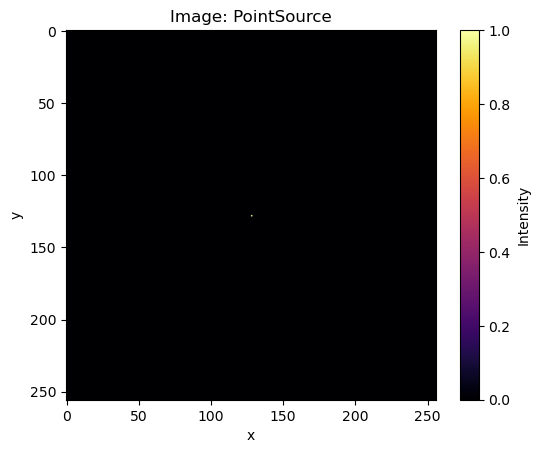

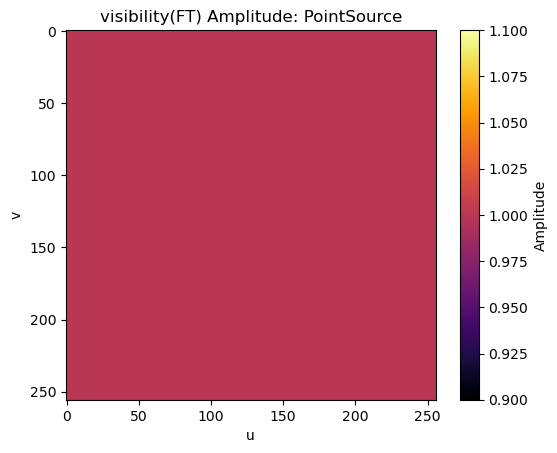

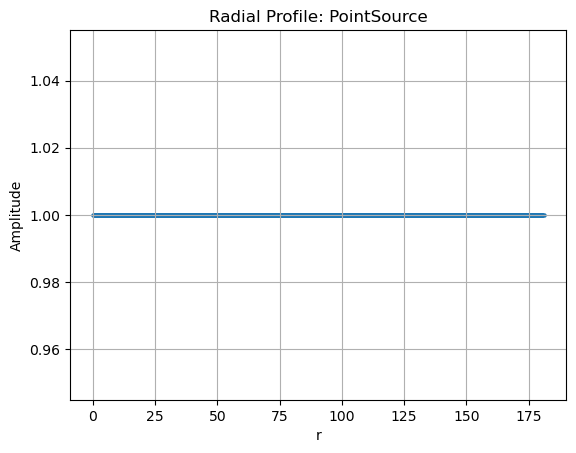


=== Processing: Uniform ===


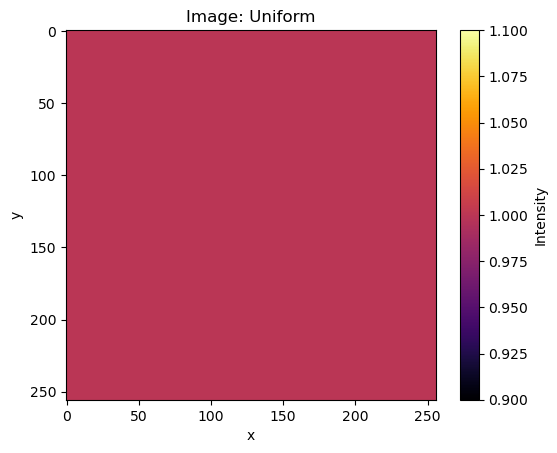

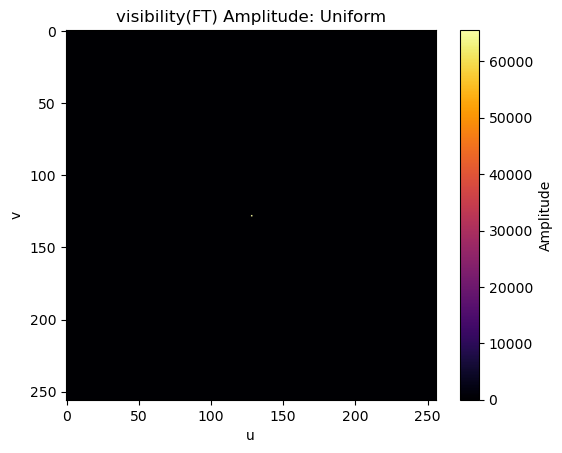

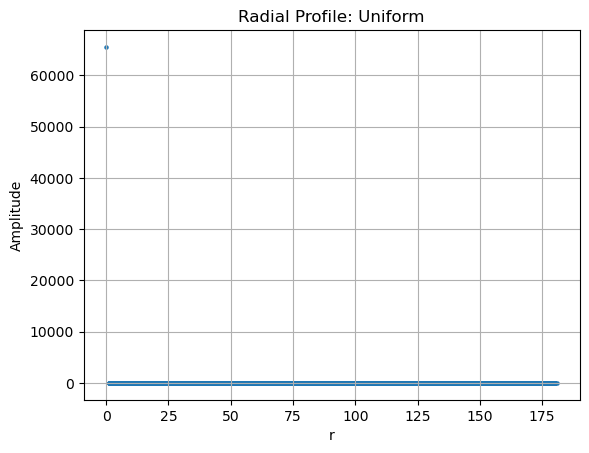


=== Processing: 2DGaussian ===


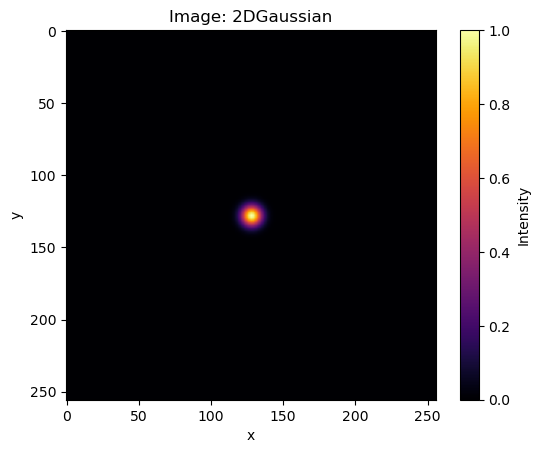

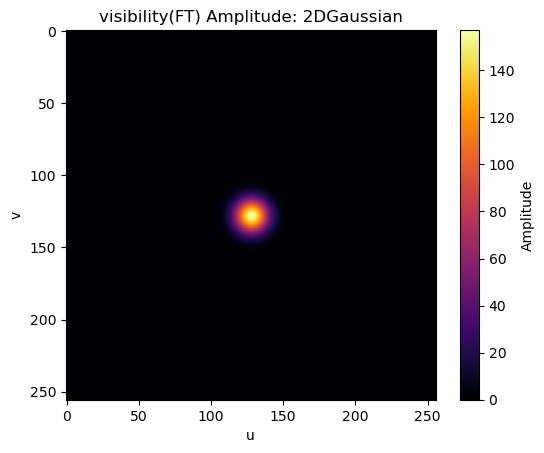

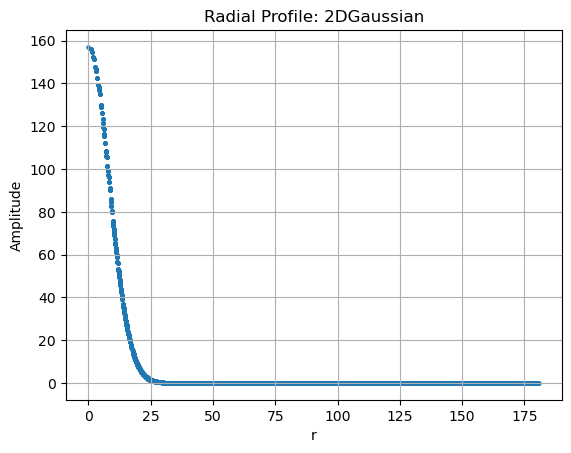


=== Processing: TwoPointSource ===


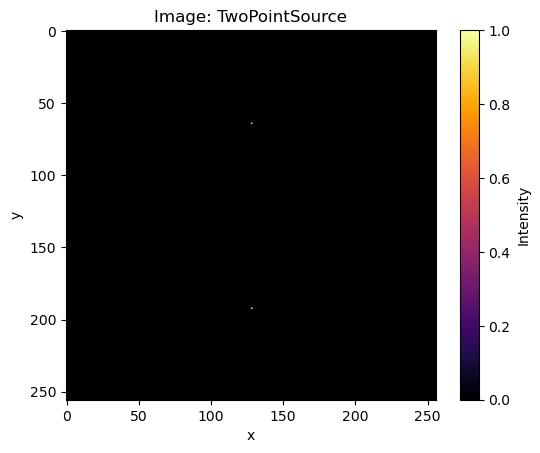

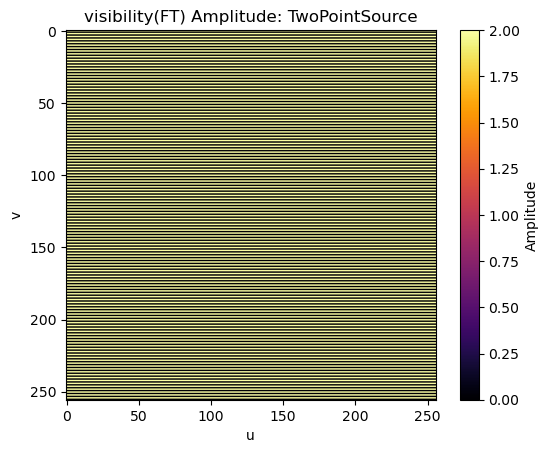

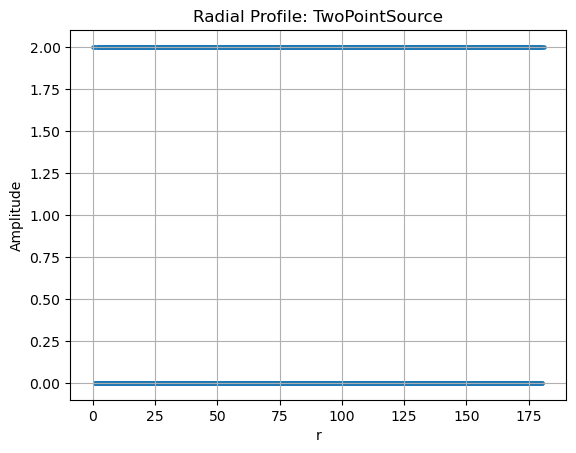


=== Processing: Ring ===


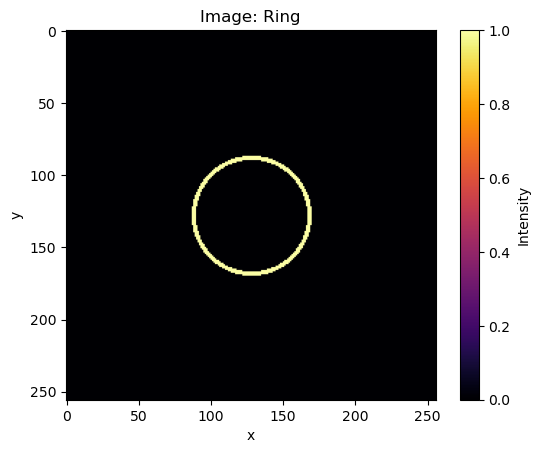

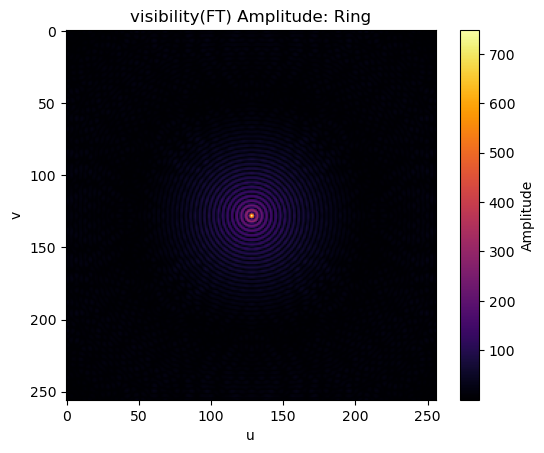

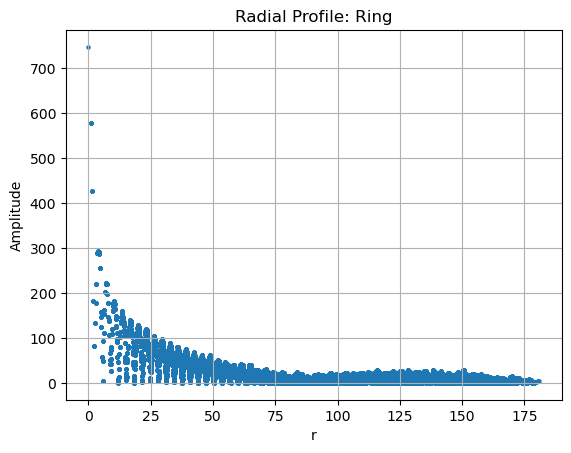

In [ ]:
# 画像タイプ
type_name_list = ["PointSource", "Uniform", "2DGaussian", "TwoPointSource", "Ring"]

for type_name in type_name_list:

    print(f"\n=== Processing: {type_name} ===")

    # 画像の生成
    subprocess.run(["g++", "-std=c++17", "CreatImage.cpp", "-o", "CreatImage"])
    subprocess.run(["./CreatImage", type_name])    
    # フーリエ変換
    subprocess.run(["g++", "-std=c++17", "Improved_FT.cpp", "-o", "FT"])
    subprocess.run(["./FT"])    
    # r=√u^2+v^2 を計算
    subprocess.run(["g++", "-std=c++17", "RadialProfile.cpp", "-o", "RP"])
    subprocess.run(["./RP"])

    # ファイル名変更
    os.rename("image.txt", f"image_{type_name}.txt")
    os.rename("amplitude.txt", f"amplitude_{type_name}.txt")
    os.rename("r_amp_list.txt", f"r_amp_{type_name}.txt")

    img = np.loadtxt(f"image_{type_name}.txt")
    plt.imshow(img, cmap="inferno")
    plt.colorbar(label="Intensity")
    plt.title(f"Image: {type_name}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.savefig(f"image_{type_name}.png")    
    plt.show()


    amp = np.loadtxt(f"amplitude_{type_name}.txt")
    plt.imshow(amp, cmap="inferno")
    plt.colorbar(label="Amplitude")
    plt.title(f"visibility(FT) Amplitude: {type_name}")
    plt.xlabel("u")
    plt.ylabel("v")
    plt.savefig(f"amplitude_{type_name}.png")    
    plt.show()



    r, a = np.loadtxt(f"r_amp_{type_name}.txt", unpack=True)
    plt.scatter(r, a, s=5)
    plt.xlabel("r")
    plt.ylabel("Amplitude")
    plt.title(f"Radial Profile: {type_name}")
    plt.grid()
    plt.savefig(f"RadialProfile_{type_name}.png")    
    plt.show()

